# ОиРС ДЗ1 Сергей Лагов ИУ8-72

Датасет со статисткой о песнях из Spotify

In [171]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from scipy.fftpack import fft
from scipy.signal import stft
import pywt.data
import pandasql as ps
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
from scipy.signal import spectrogram

In [172]:
FILENAME = "spotify_songs.csv"

df = pd.read_csv(FILENAME, sep=',')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [173]:
# Возьмем зависимость средней продолжительности всех песен, выпущенных в определенное время (дату), от времени (даты)

TRACK_ALBUM_RELEASE_DATE = 'track_album_release_date'
DURATION_MS = 'duration_ms'

series = ps.sqldf(f"select {TRACK_ALBUM_RELEASE_DATE}, AVG({DURATION_MS}) as {DURATION_MS} "
                  f"from df where {TRACK_ALBUM_RELEASE_DATE} LIKE '2019-1%' "
                  f"group by {TRACK_ALBUM_RELEASE_DATE} "
                  f"order by {TRACK_ALBUM_RELEASE_DATE} asc")

series

,track_album_release_date,duration_ms
0,2019-10-01,212587.200000
1,2019-10-02,190648.125000
2,2019-10-03,205735.000000
3,2019-10-04,192627.679245
4,2019-10-05,194778.000000
...,...,...
87,2019-12-27,203663.313043
88,2019-12-28,247815.000000
89,2019-12-29,183814.000000
90,2019-12-30,212066.400000


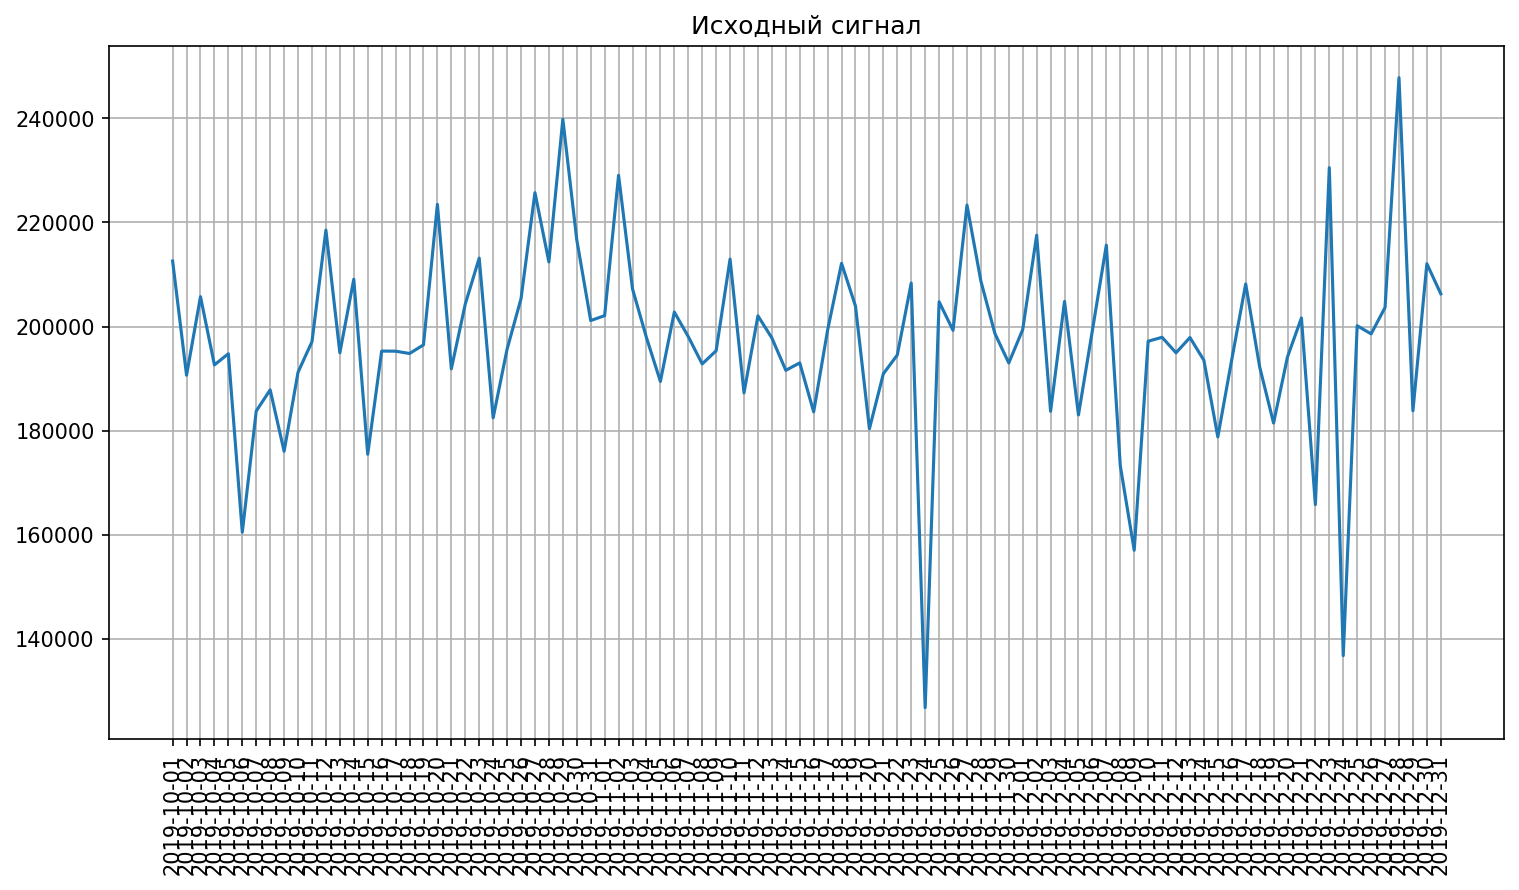

In [174]:
pyplot.figure(figsize=(12, 6), dpi=150)
pyplot.plot(series[TRACK_ALBUM_RELEASE_DATE].values, series[DURATION_MS].values)
pyplot.title('Исходный сигнал')
pyplot.xticks(rotation=90)
pyplot.rc('font', size=7)
pyplot.grid(True)
pyplot.show()

In [175]:
# 1 — Математическое ожидание — понятие в теории вероятностей, означающее среднее (взвешенное по вероятностям возможных значений) значение случайной величины. В случае непрерывной случайной величины подразумевается взвешивание по плотности распределения
# 2 — Дисперсия случайной величины — мера разброса значений случайной величины относительно её математического ожидания
# 3 — Размах сигнала — расстояние между минимумом и максимумом

dataset = series[DURATION_MS].values
min_val, max_val = np.min(dataset), np.max(dataset)
{'Mean': np.mean(dataset), 'Variance': np.var(dataset), 'Min': min_val, 'Max': max_val, 'Scope': abs(max_val - min_val)}

{'Mean': 197421.16827526785,
 'Variance': 321772226.0006235,
 'Min': 126778.0,
 'Max': 247815.0,
 'Scope': 121037.0}

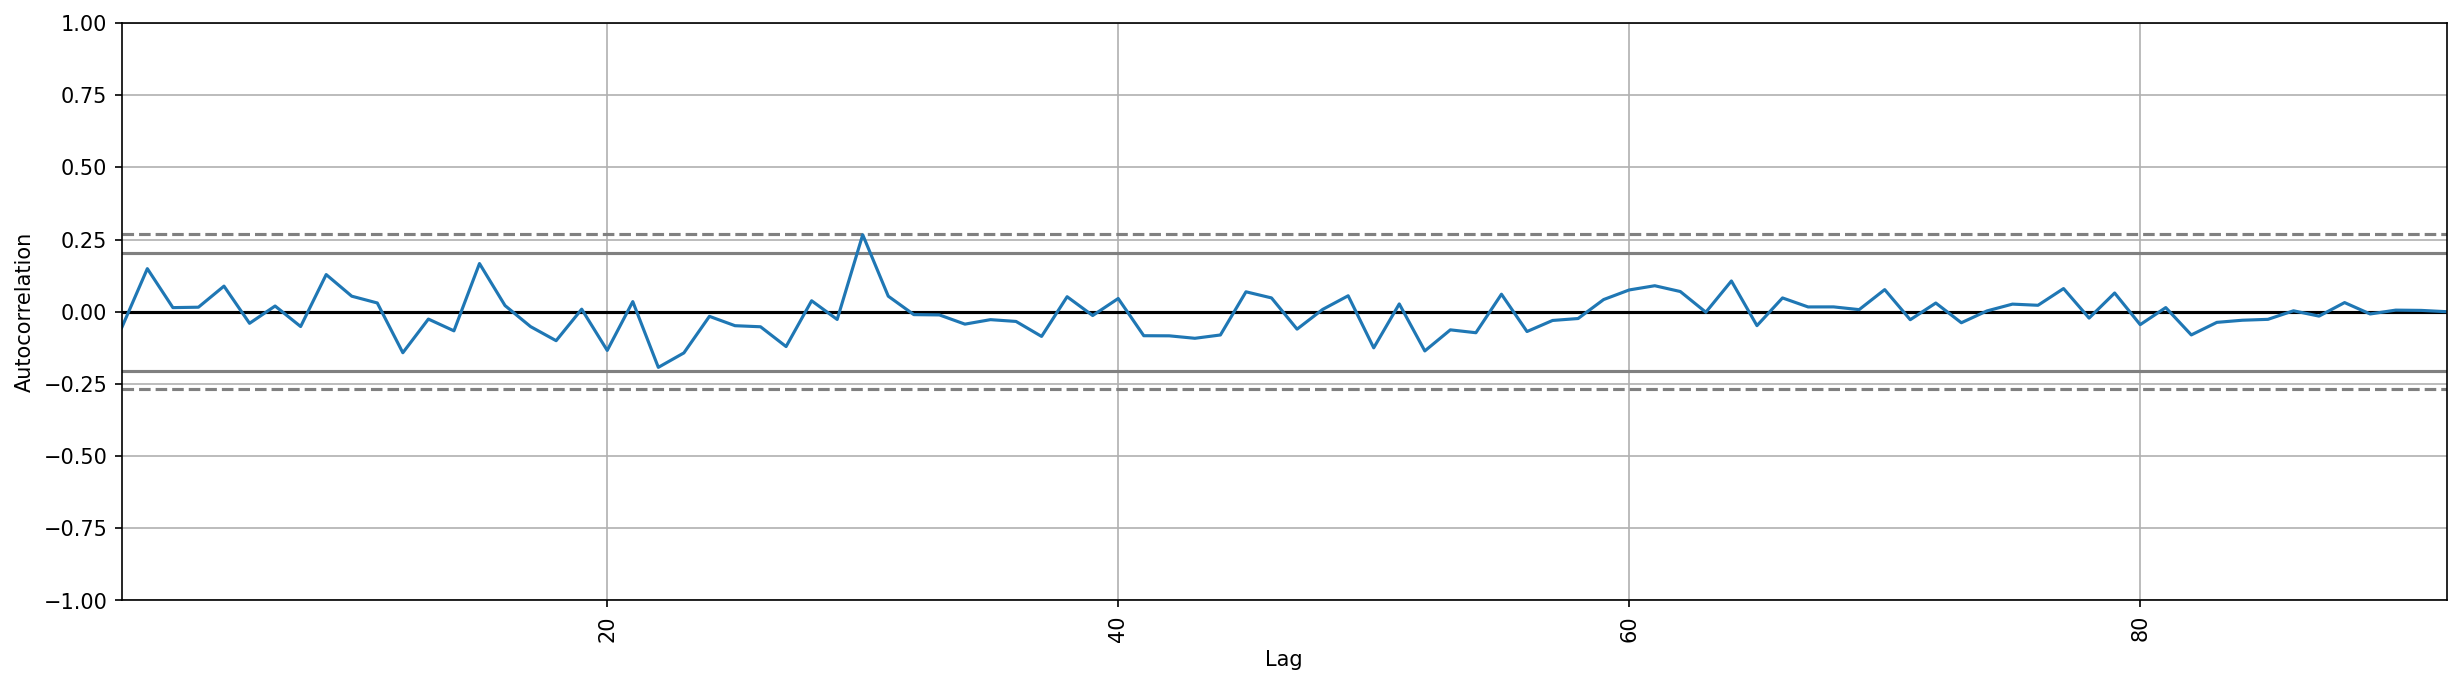

In [176]:
# 4 — Автокорреляционная функция — зависимость взаимосвязи между функцией (сигналом) и её сдвинутой копией от величины временного сдвига

pyplot.rcdefaults()
pyplot.figure(figsize=(20, 5), dpi=150)
pd.plotting.autocorrelation_plot(series[DURATION_MS].values).plot()
pyplot.xticks(rotation=90)
pyplot.show()

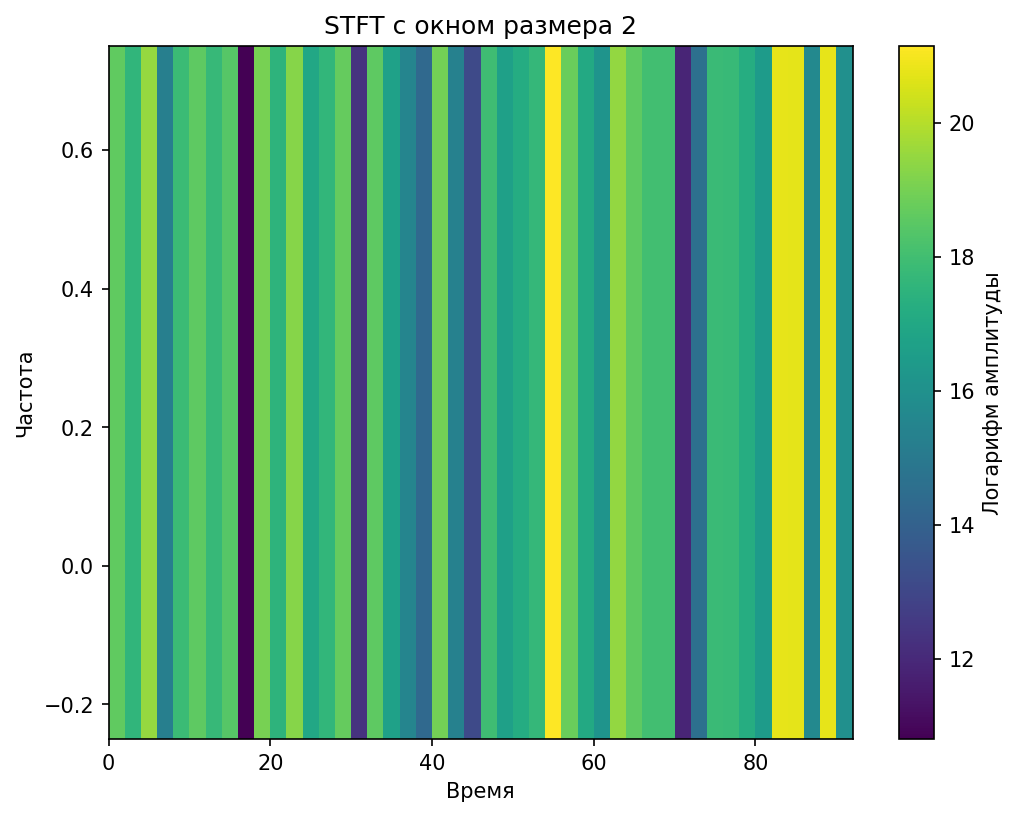

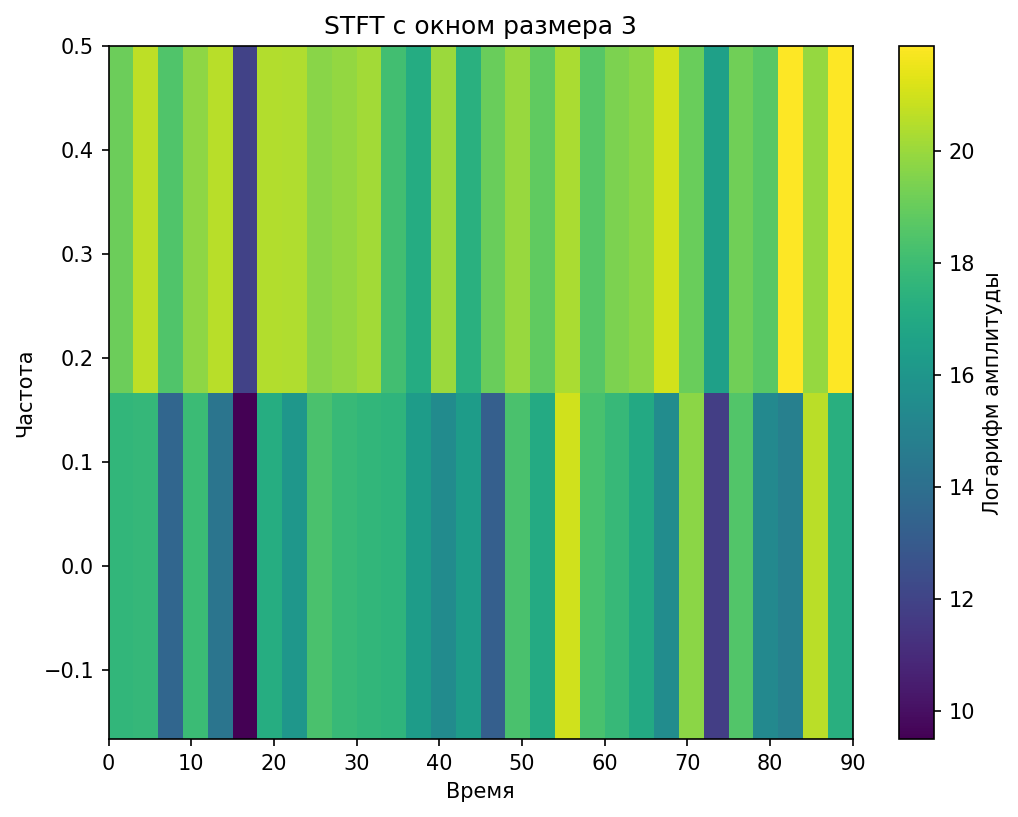

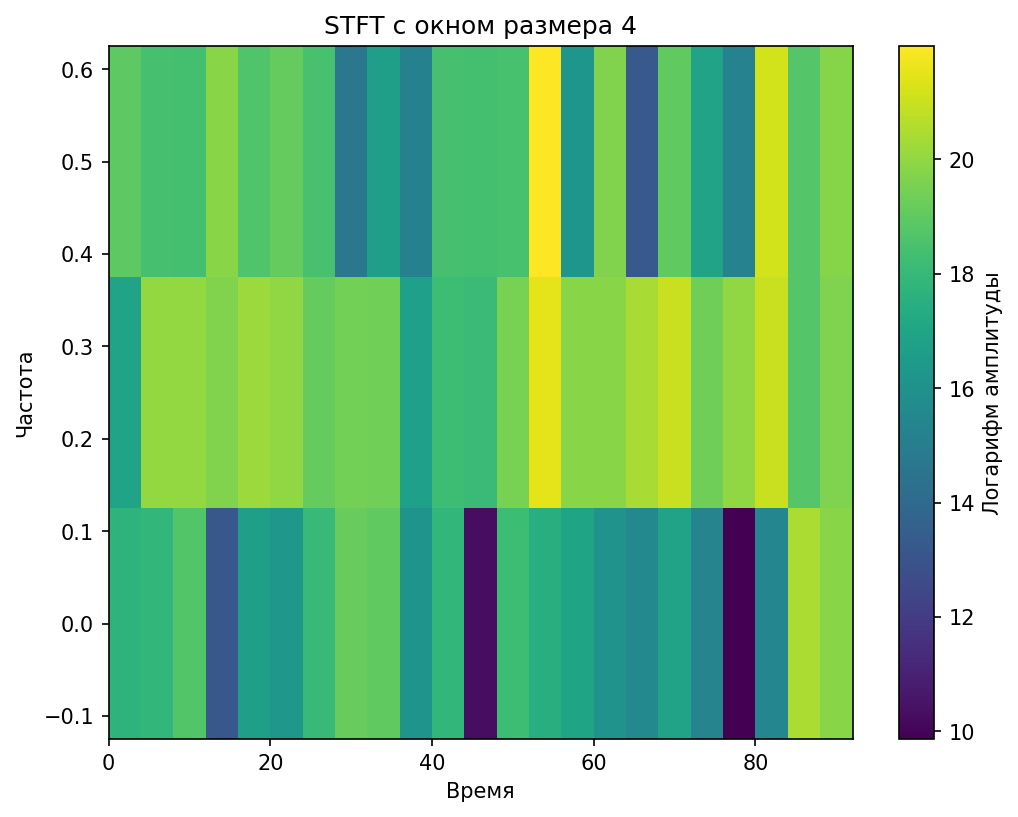

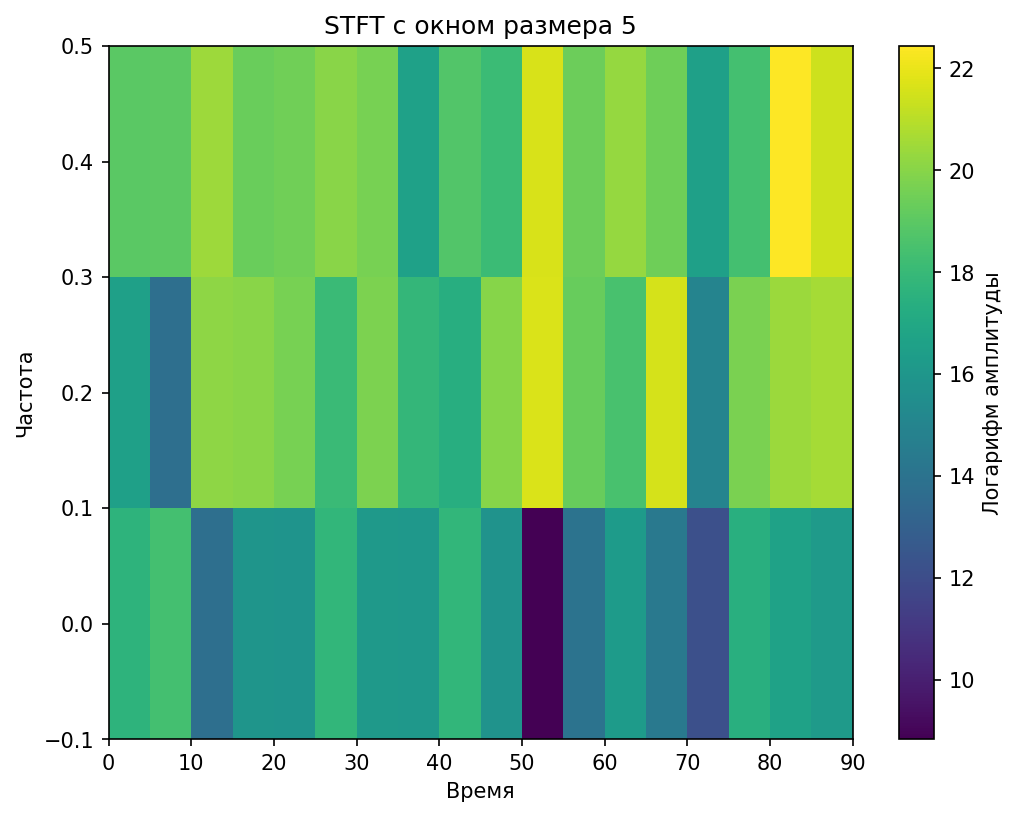

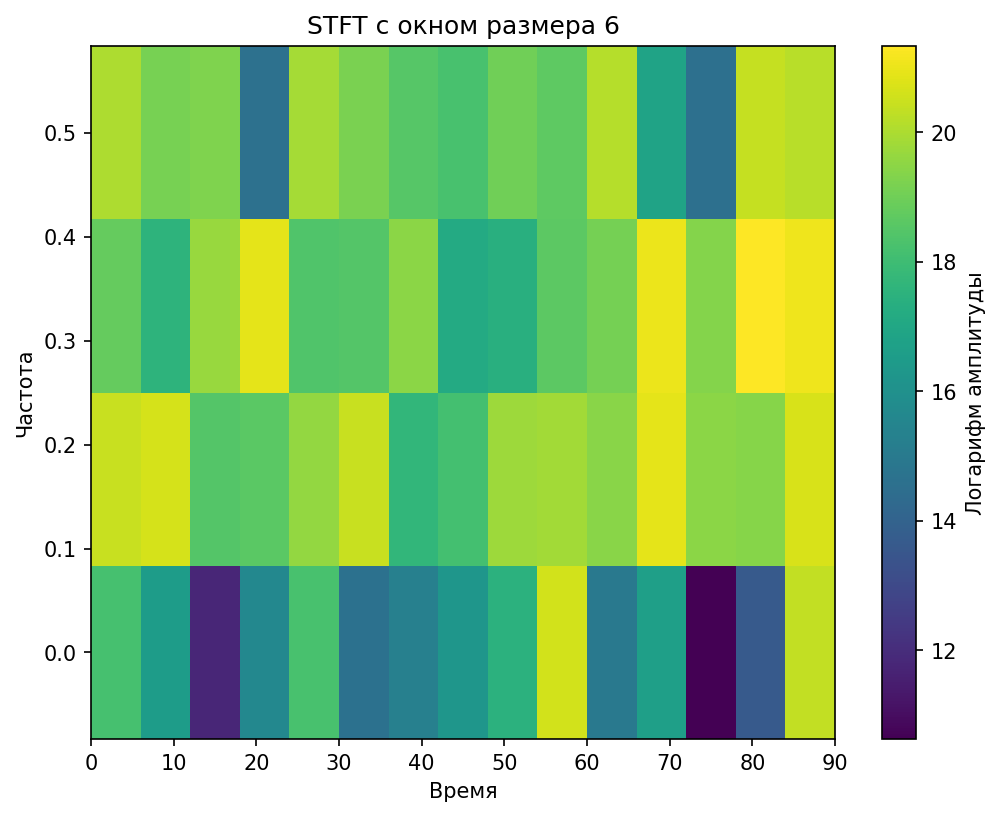

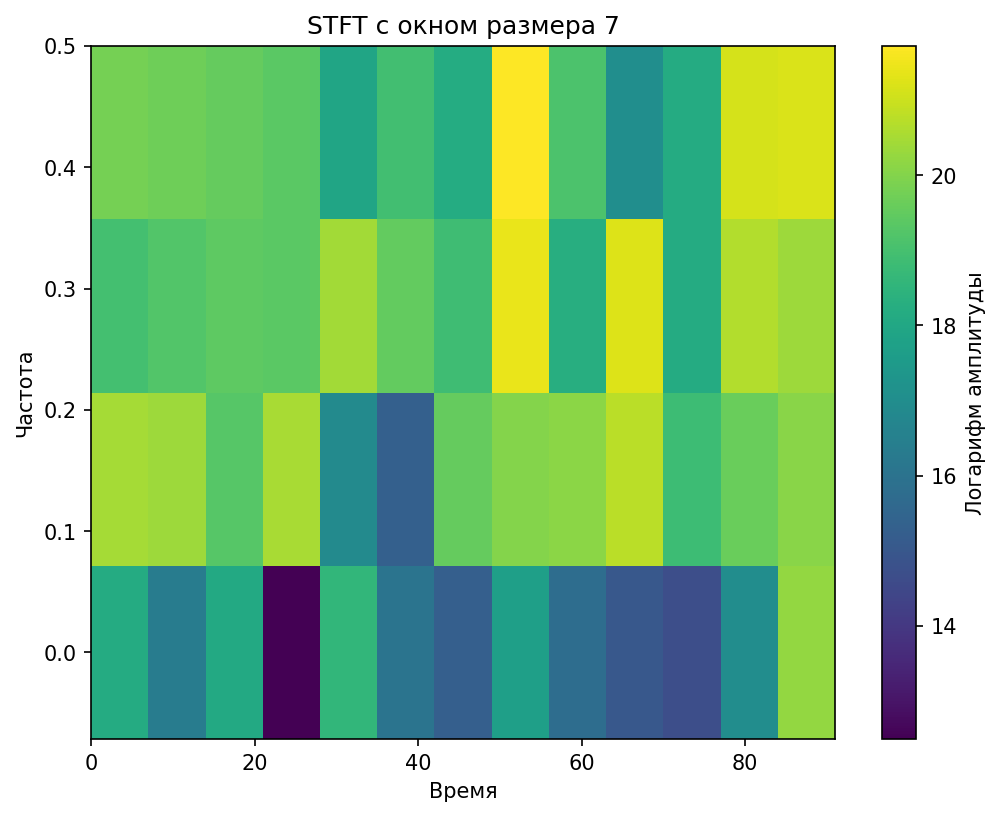

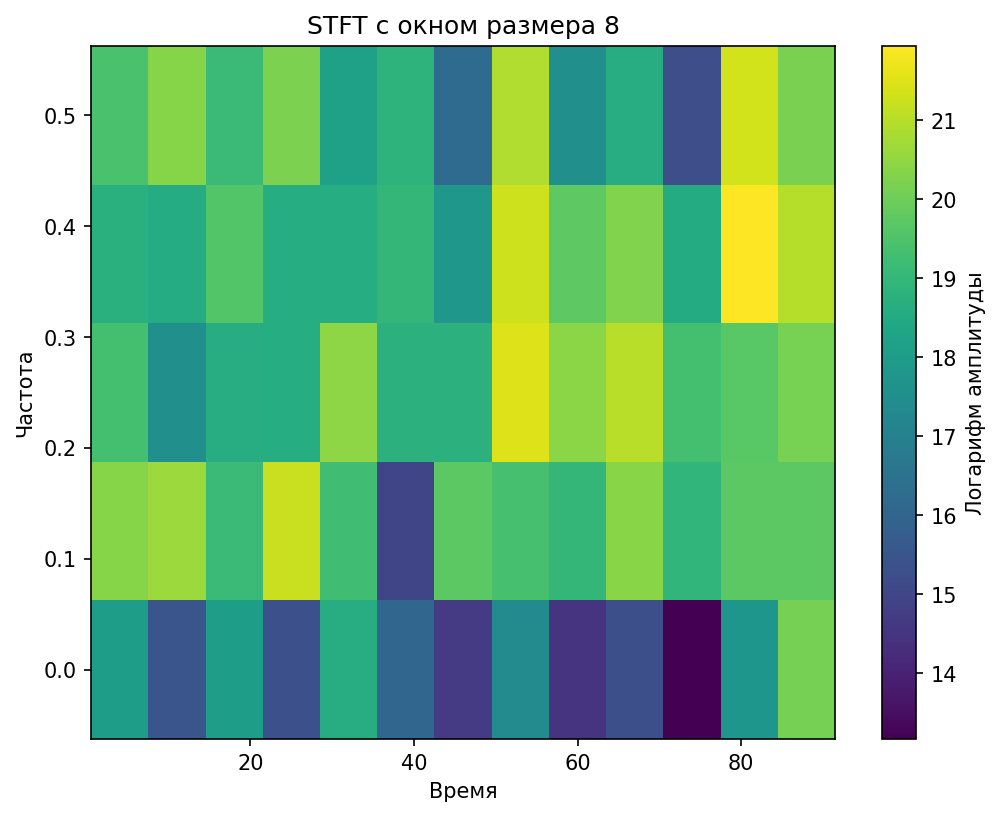

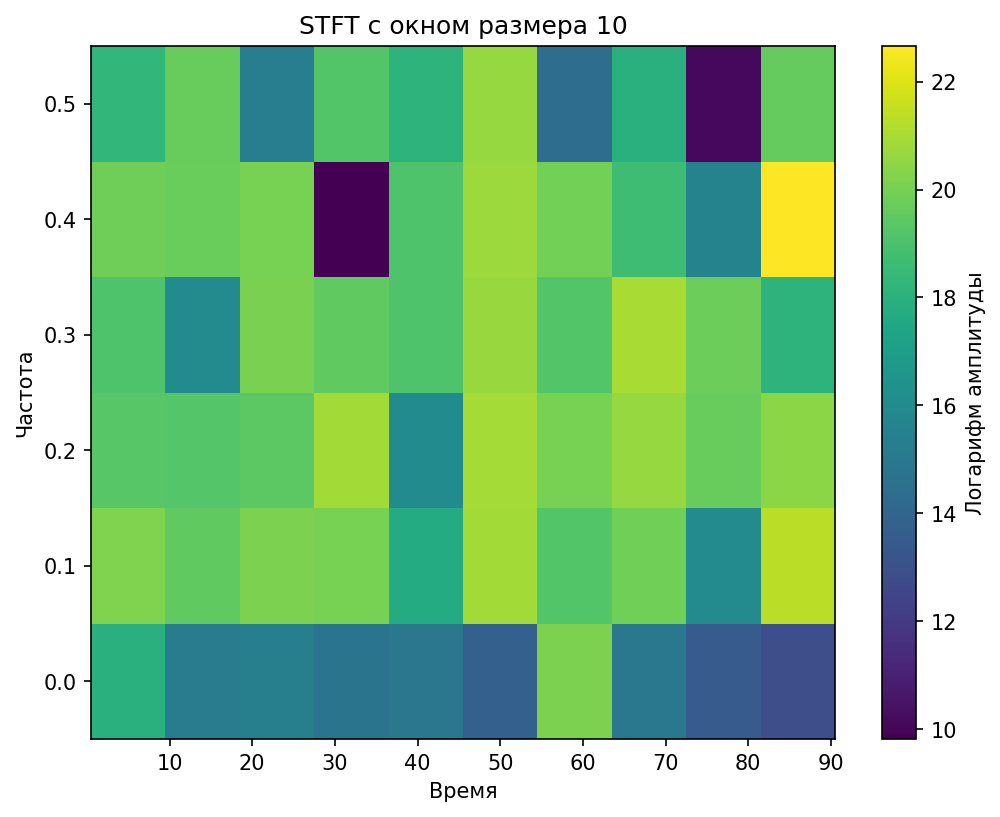

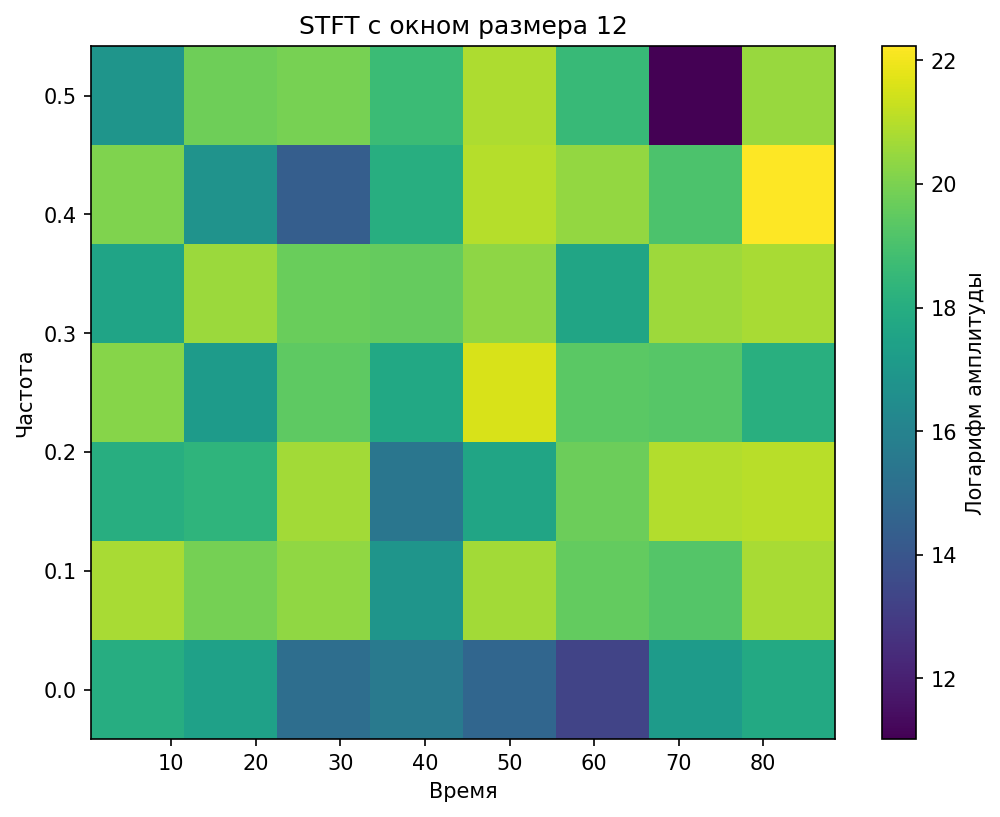

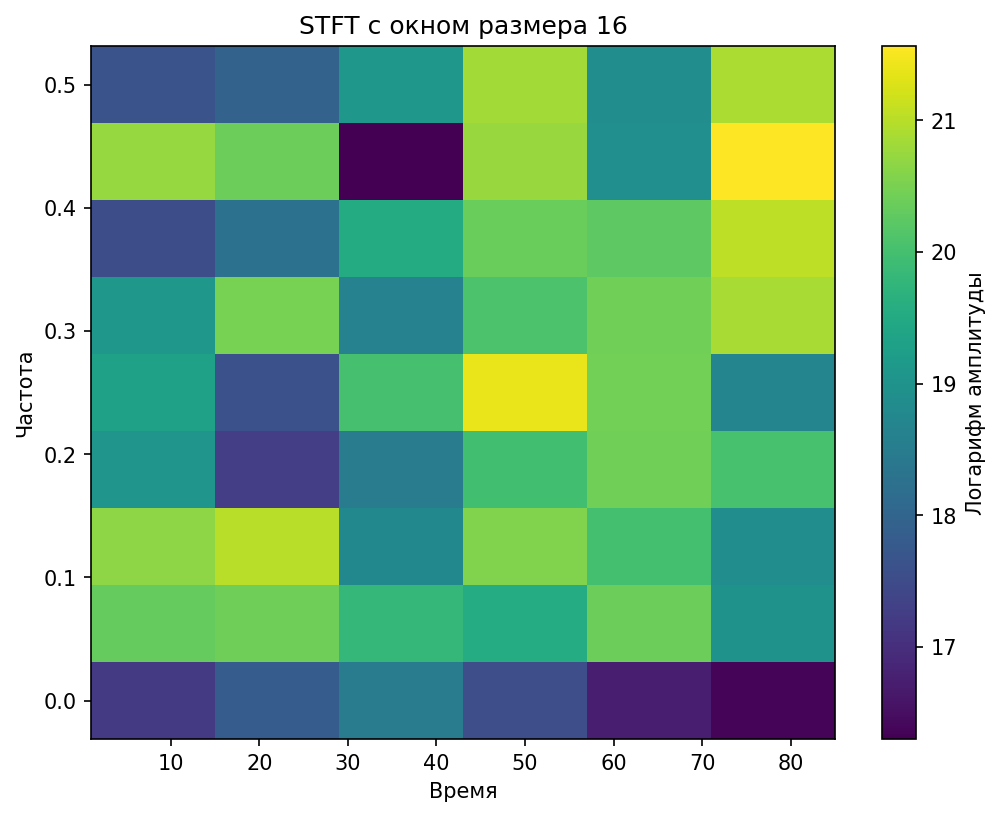

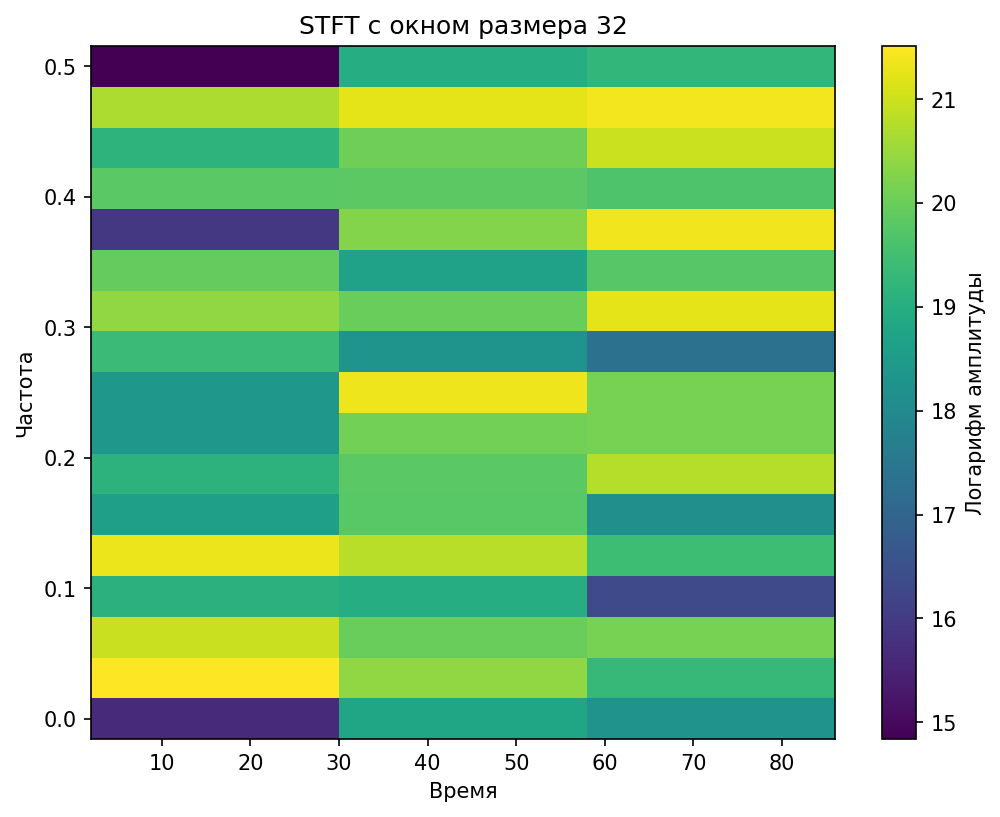

In [177]:
# 5 — Находим оконное преобразование Фурье, где нужно подобрать оптимальные размеры окна
# На практике нет возможности получить сигнал на бесконечном интервале. Ограничение интервала анализа равносильно произведению исходного сигнала на прямоугольную оконную функцию
# Таким образом, результатом оконного преобразования Фурье является не спектр исходного сигнала, а спектр произведения сигнала и оконной функции
# В результате возникает эффект, называемый растеканием спектра сигнала. Опасность заключается в том, что боковые лепестки сигнала более высокой амплитуды могут маскировать присутствие других сигналов меньшей амплитуды

# Различные размеры окон для применения в STFT
window_sizes = [2, 3, 4, 5, 6, 7, 8, 10, 12, 16, 32]

data = series[DURATION_MS].values

# Применение окон различных размеров для STFT и построение спектрограммы для каждого
for size in window_sizes:
    frequencies, time_segments, stft_data = spectrogram(data,
                                                        fs=1.0,
                                                        nperseg=size)
    pyplot.figure(figsize=(8, 6), dpi=150)
    pyplot.pcolormesh(time_segments, frequencies, np.log(stft_data))
    pyplot.title(f'STFT с окном размера {size}')
    pyplot.xlabel('Время')
    pyplot.ylabel('Частота')
    pyplot.colorbar().set_label('Логарифм амплитуды')
    pyplot.show()

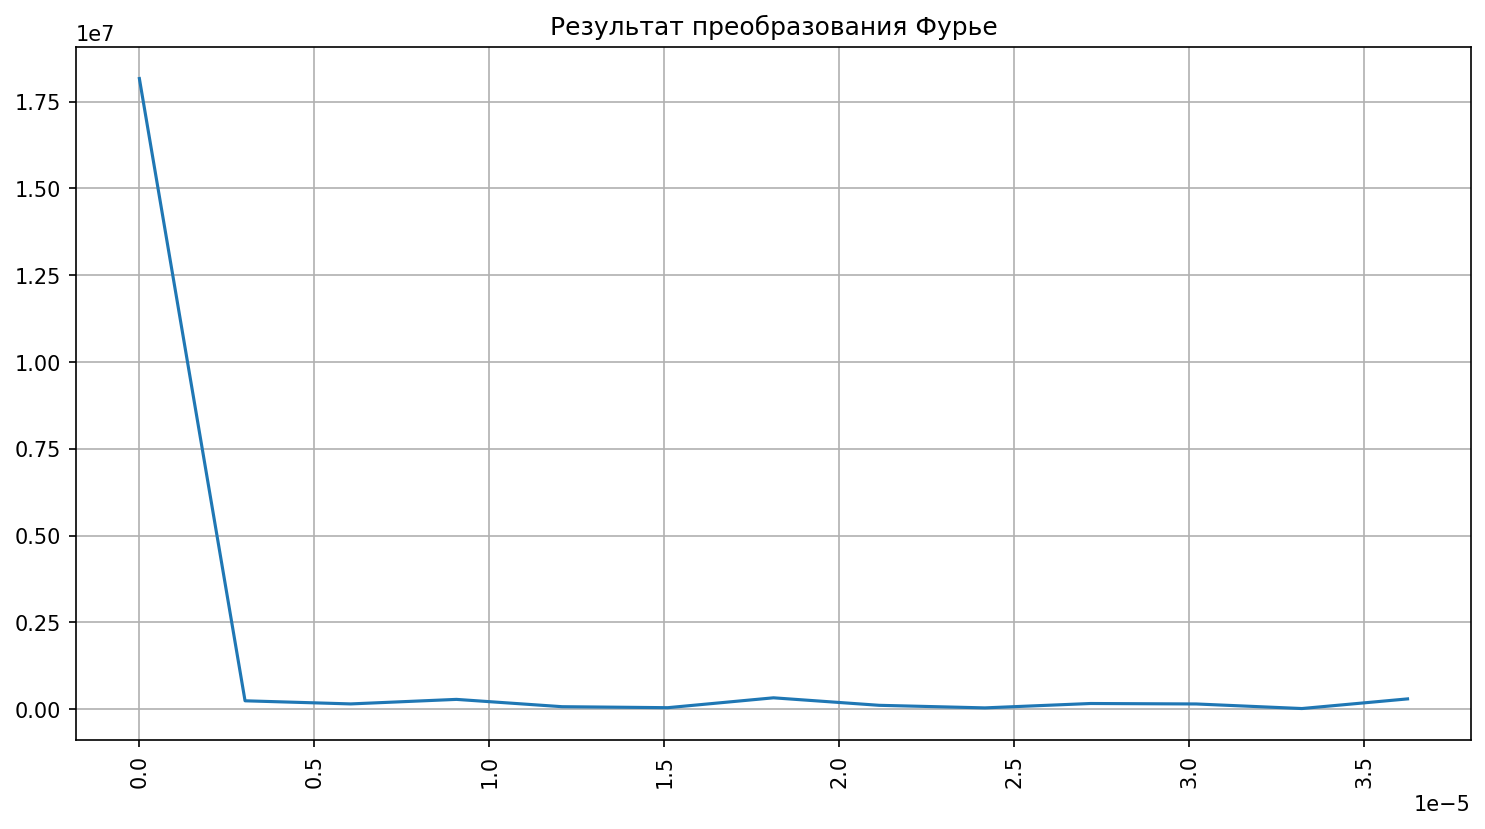

In [178]:
WINDOW = 7

vals = series[DURATION_MS].values
xs = fft(vals)
length = len(xs)
n = np.arange(length)

# get the sampling rate
sr = 1 / (60 * 60)
T = length / sr
freq = n / T

# Get the one-sided specturm
n_oneside = length // WINDOW  # делить на количество окон
# get the one side frequency
f_oneside = freq[:n_oneside]

pyplot.figure(figsize=(12, 6), dpi=150)
pyplot.plot(f_oneside, np.abs(xs[:n_oneside]))
pyplot.title('Результат преобразования Фурье')
pyplot.xticks(rotation=90)
pyplot.grid(True)
pyplot.show()

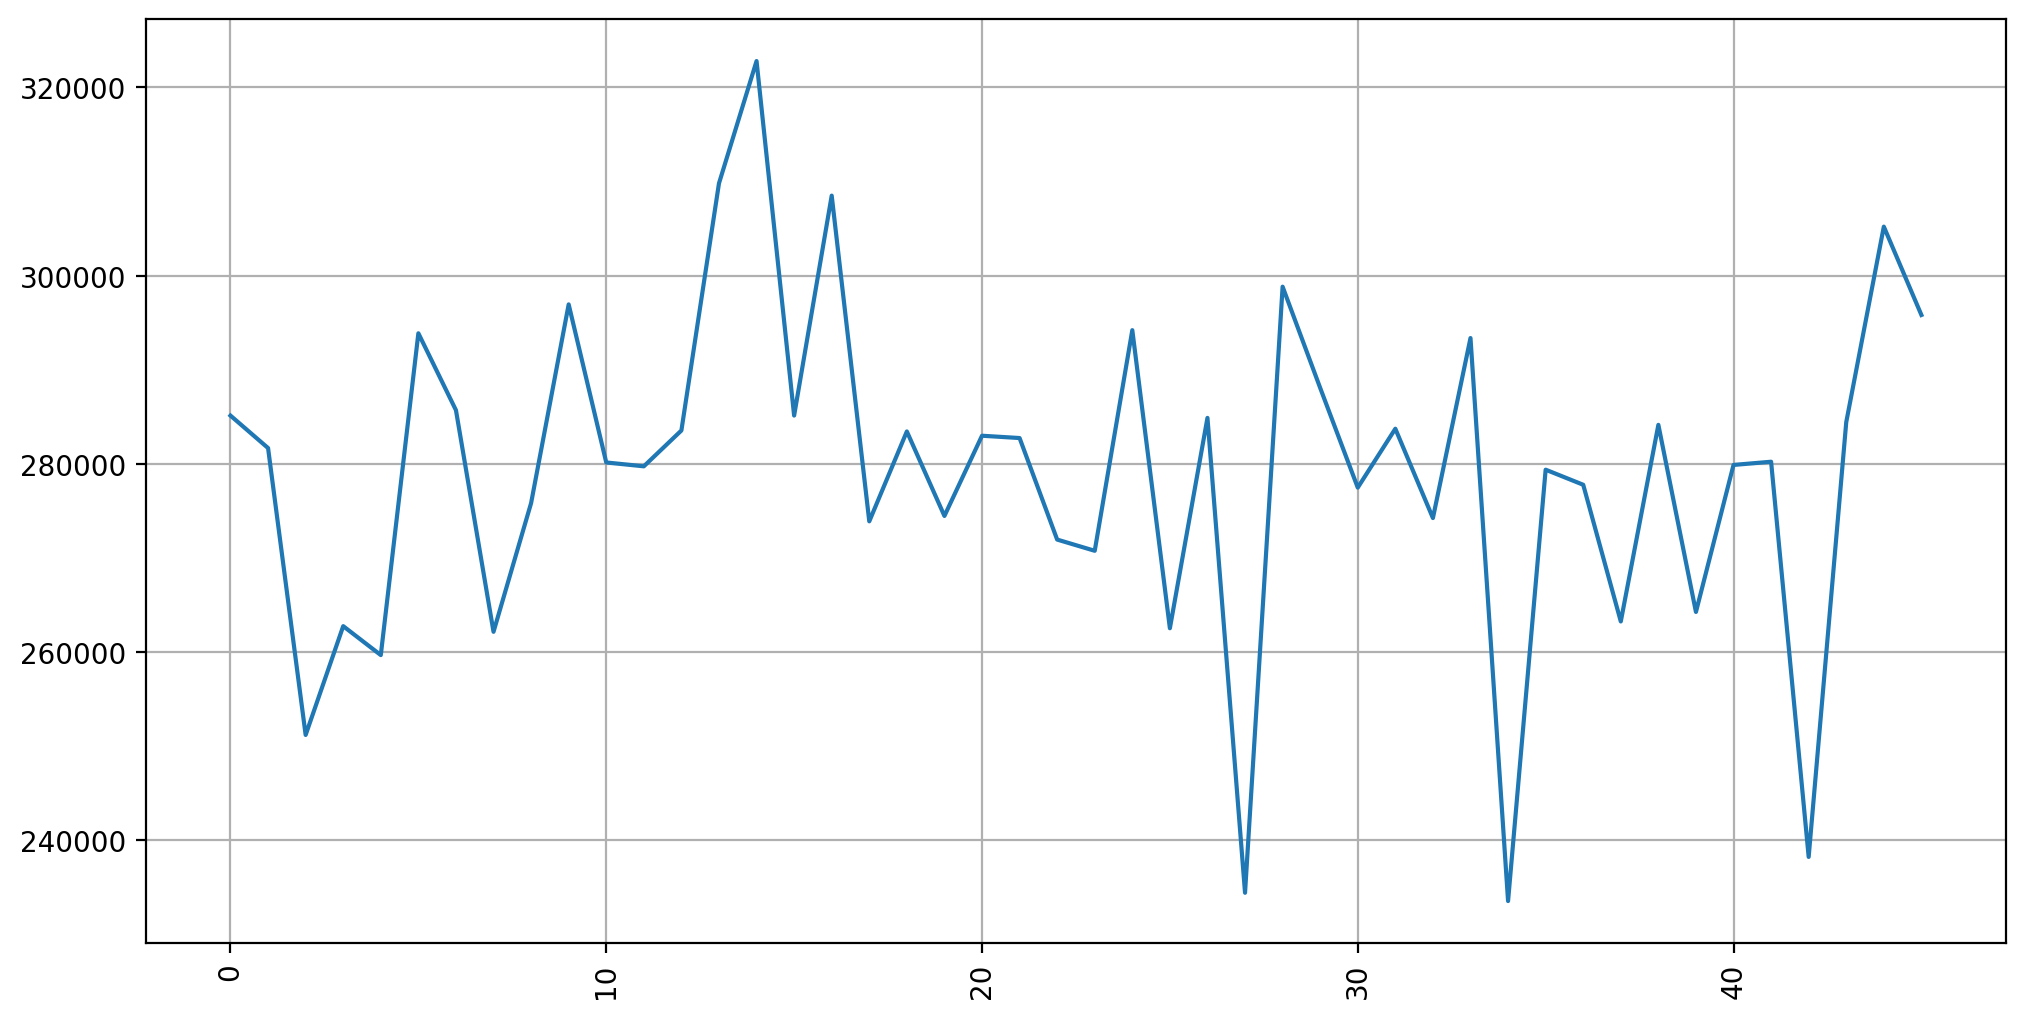

In [179]:
# 6 — Для всей частотной и временной области находим вейвлет Хаара
# Преобразование Хаара используется для сжатия входных сигналов, компрессии изображений, в основном цветных и черно-белых с плавными переходами
# Идеален для картинок типа рентгеновских снимков
# Данный вид архивации известен довольно давно и напрямую исходит из идеи использования когерентности sобластей. Степень сжатия задается и варьируется в пределах 5-100

c_a, c_d = pywt.dwt(series[DURATION_MS].values, "haar")
pyplot.figure(figsize=(12, 6), dpi=200)
pyplot.plot(c_a, label="Approximation coeffs")
pyplot.xticks(rotation=90)
pyplot.grid(True)
pyplot.show()

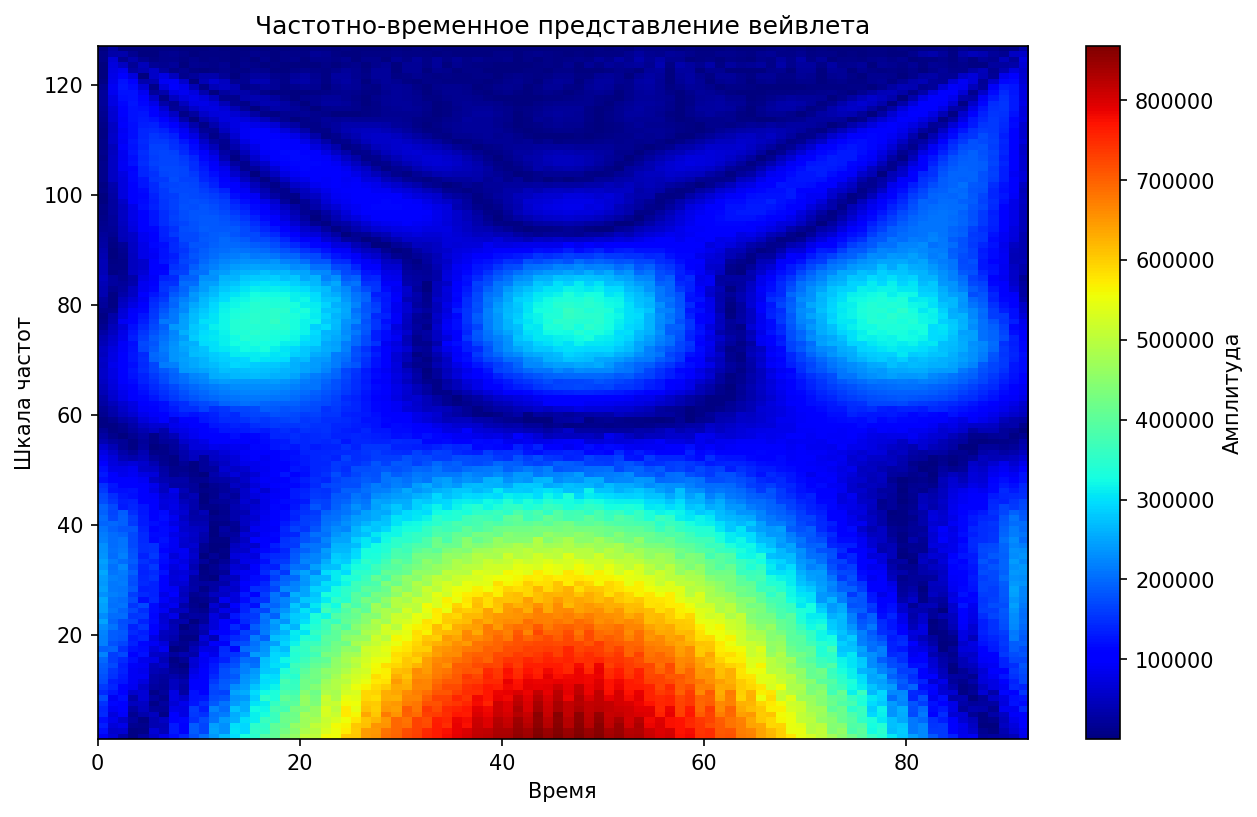

In [180]:

# 7 — Частотно-временная локализация вейвлета — это способность вейвлета отображать как частотные, так и временные характеристики сигнала. Вейвлеты обеспечивают эффективное представление сигналов во временно-частотной области, позволяя анализировать сигналы с разной частотной информацией в разные моменты времени.
# Частотно-временная локализация вейвлета позволяет исследовать, какие частоты преобладают в сигнале в разные моменты времени. Это позволяет обнаруживать временные изменения в частотной структуре сигнала. Вейвлеты обладают свойством детектировать короткосрочные и долгосрочные временные структуры сигнала, что делает их полезными для анализа нестационарных сигналов.
# Путем применения вейвлетного преобразования к сигналу и визуализации результатов можно увидеть, как вейвлет "сжимается" и "растягивается" во времени и частоте в зависимости от характеристик сигнала в конкретные моменты времени. Такая локализация помогает выявлять различные компоненты сигнала в разных частях его длительности и частотной характеристики.

data = series[DURATION_MS].values

# Выбор шкалы частот
scales = np.arange(1, 128)

# Выполнение непрерывного вейвлет-преобразования
# Выбор вейвлета, например, 'morl'
cwtmatr, freqs = pywt.cwt(data, scales, 'morl')

# Построение частотно-временного представления вейвлета
pyplot.figure(figsize=(10, 6), dpi=150)
pyplot.imshow(np.abs(cwtmatr),
              extent=(0, len(series.index), min(scales), max(scales)),
              aspect='auto',
              cmap='jet')
pyplot.colorbar(label='Амплитуда')
pyplot.title('Частотно-временное представление вейвлета')
pyplot.xlabel('Время')
pyplot.ylabel('Шкала частот')
pyplot.show()

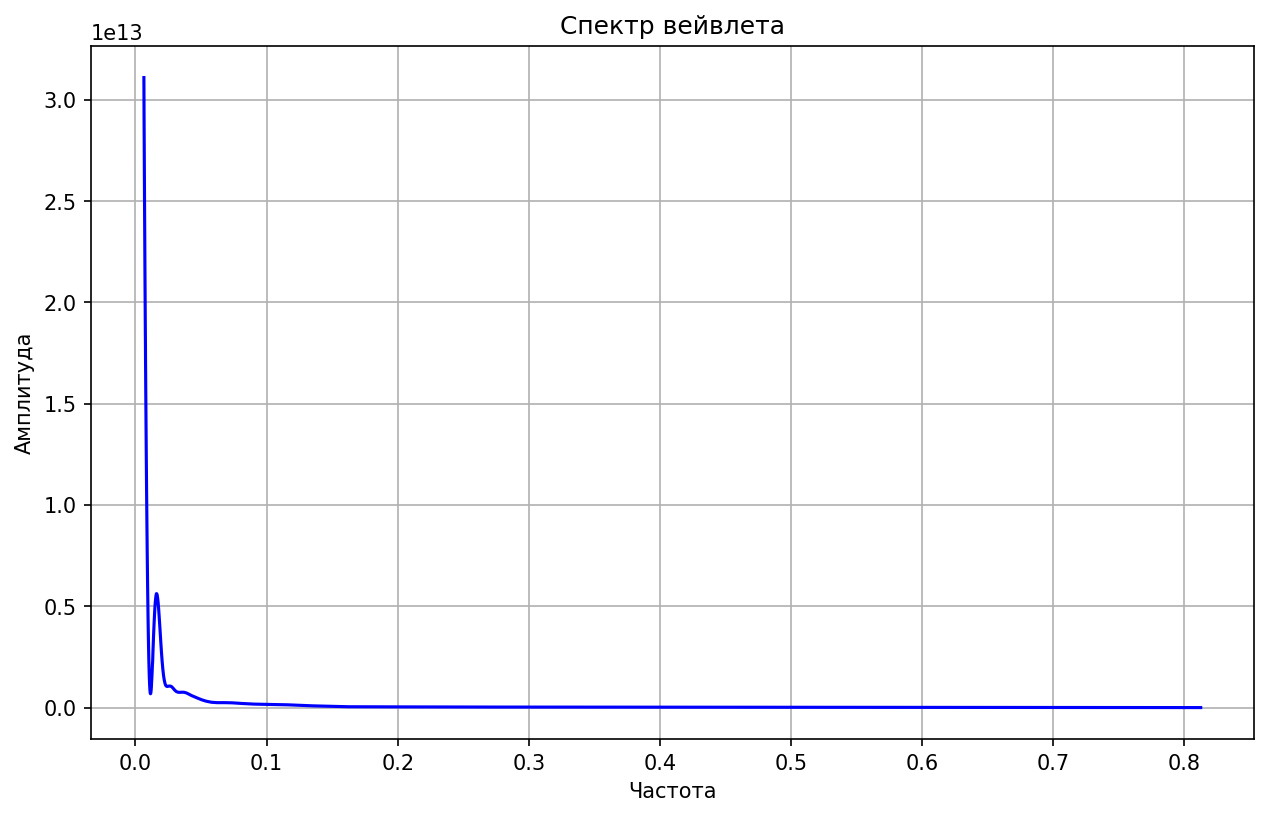

In [181]:
# 8 — Спектр вейвлета
#Спектр вейвлета представляет собой его частотную характеристику. Это графическое представление показывает, какие частоты вейвлет способен обнаружить в сигнале при различных масштабах (или частотах) и как эти частоты варьируются во времени.
# Спектр вейвлета - это график зависимости частотной составляющей вейвлета от его масштаба (или обратно, от его частоты). Он помогает определить, какие частоты вейвлет способен локализовать в сигнале в зависимости от его положения во времени. Это позволяет исследовать частотную информацию сигнала на различных временных отрезках.
# Обычно спектр вейвлета отображает относительную чувствительность вейвлета к различным частотам в зависимости от масштаба. Это позволяет анализировать не только частоты, которые вейвлет хорошо выделяет, но и его чувствительность к этим частотам в разные моменты времени.
# Спектр вейвлета является важным инструментом для понимания частотной разрешимости вейвлетного преобразования и его способности анализировать разные частоты в сигнале в зависимости от их временной локализации.

data = series[DURATION_MS].values

# Выбор шкалы частот
scales = np.arange(1, 128)

# Выполнение непрерывного вейвлет-преобразования Морле
# Выбор вейвлета, например, 'morl'
cwtmatr, freqs = pywt.cwt(data, scales, 'morl')

# Нахождение спектра вейвлета
wavelet_spectrum = np.sum(np.abs(cwtmatr) ** 2, axis=1)  # Расчет спектра вейвлета

# Построение графика спектра вейвлета
pyplot.figure(figsize=(10, 6), dpi=150)
pyplot.plot(freqs, wavelet_spectrum, color='blue')
pyplot.title('Спектр вейвлета')
pyplot.xlabel('Частота')
pyplot.ylabel('Амплитуда')
pyplot.grid(True)
pyplot.show()

9 — Сравнение п.5 и п.6

При изменении размера окна в оконном преобразовании Фурье мы либо получаем высокую точность относительно частоты, но при этом очень низкую точность относительно времени, либо наоборот высокую точность относительно времени, и низкую относительно частоты. Основное различие лежит в следующем: преобразование Фурье раскладывает сигнал на составляющие в виде синусов и косинусов, т.е. функций, локализованных в Фурье-пространстве; напротив, вейвлет-преобразование использует функции, локализованные как в реальном, так и в Фурье-пространстве

Таким образом, вейвлет-преобразования, в отличии от оконного преобразования Фурье, которое имеет постоянный масштаб в любой момент времени для всех частот, имеет лучшее представление времени и худшее представление частоты на низких частотах сигнала и лучшее представление частоты с худшим представлением времени на высоких частотах сигнала

Исходя из сравнения предыдущих графиков можно сделать вывод, что мы получили больше информации об исходной функции и можем теперь начинать фильтровать и восстанавливать сигнал

/Users/slagov/Documents/spar/venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/slagov/Documents/spar/venv/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


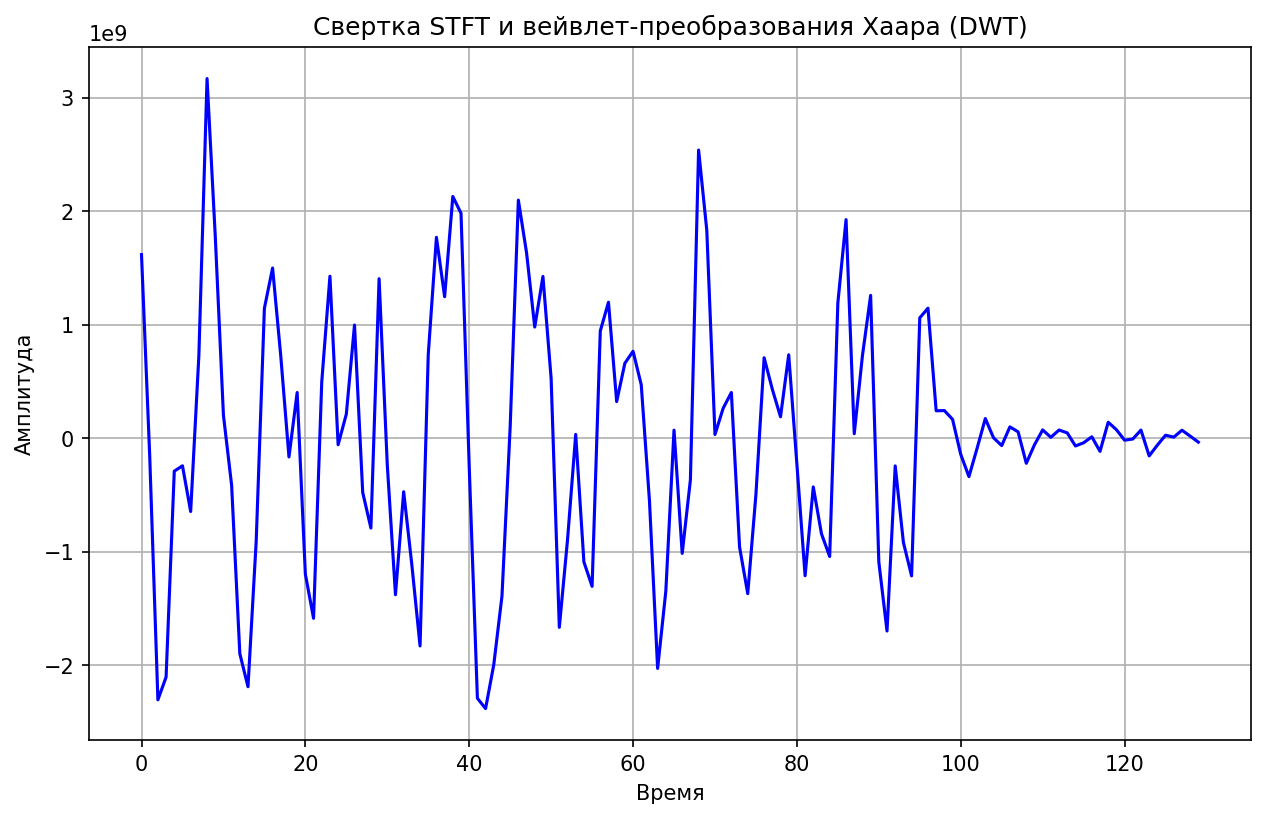

In [182]:
# 10 — Свертка из п.5 и п.6
# Свертка между оконным преобразованием Фурье (STFT) и вейвлетом Хаара представляет собой процесс, в котором результаты оконного преобразования Фурье (STFT) и вейвлетного преобразования (в данном случае - вейвлета Хаара) сворачиваются друг с другом
# STFT используется для анализа частотных компонентов сигнала во времени с помощью применения оконного преобразования Фурье на коротких временных отрезках сигнала. Вейвлет Хаара, с другой стороны, является вейвлетом, который обладает свойствами быстрого локального изменения, хорошо локализован во времени и имеет простую структуру
# Свертка между результатами STFT и вейвлетного преобразования Хаара позволяет выявить, как различные частотные компоненты, обнаруженные с помощью STFT, коррелируют с особенностями, выявленными вейвлетом Хаара. Это позволяет выделить специфические характеристики сигнала, которые выявлены обоими методами одновременно и показывает, как частотные компоненты сигнала коррелируют с его временными особенностями
# Такая свертка может помочь выявить значимые особенности сигнала, которые могут быть локализованы как во времени, так и в частотной области, используя комбинацию методов анализа

# Получение результатов оконного преобразования Фурье (STFT)
# Параметры могут варьироваться
frequencies, time_segments, stft_data = stft(data, fs=0.5, nperseg=50)

# Выполнение дискретного вейвлет-преобразования Хаара (DWT)
wavelet_coeffs = pywt.dwt(stft_data.flatten(), 'haar')

# Свертка между результатами STFT и вейвлет-преобразования Хаара (DWT)
convolution_result = np.convolve(stft_data.flatten(),
                                 wavelet_coeffs[0],
                                 mode='same')

# Построение графика свертки
pyplot.figure(figsize=(10, 6), dpi=150)
pyplot.plot(np.arange(len(convolution_result)), convolution_result, color='blue')
pyplot.title('Свертка STFT и вейвлет-преобразования Хаара (DWT)')
pyplot.xlabel('Время')
pyplot.ylabel('Амплитуда')
pyplot.grid(True)
pyplot.show()

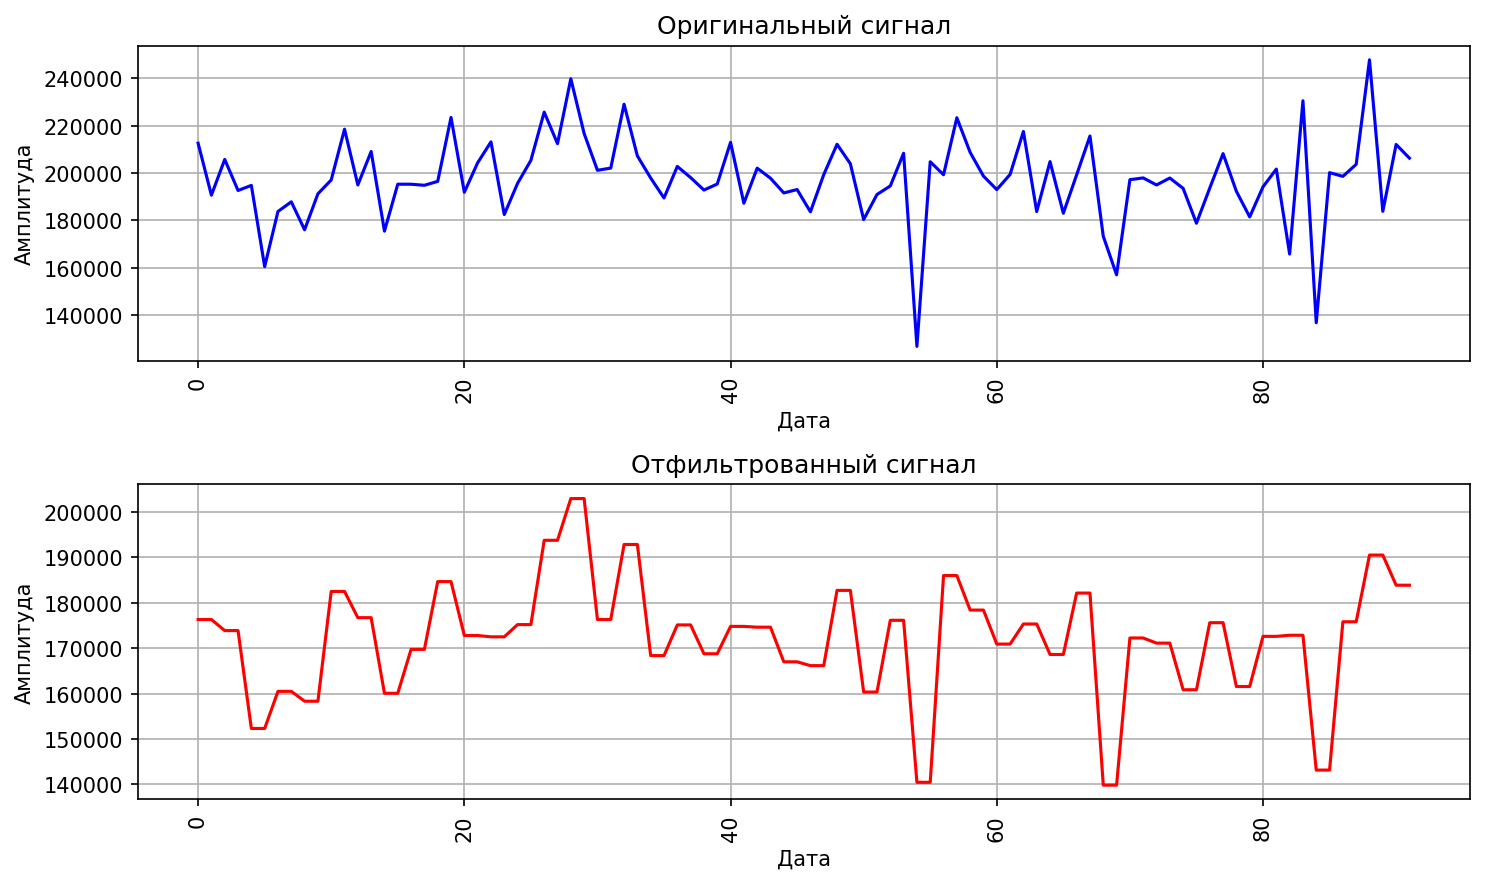

In [183]:
# 11 — Проводим пороговую фильтрацию сигнала, которая позволяет избавиться от резких и ненужных всплесков

# Выполнение дискретного вейвлет-преобразования Хаара (DWT)
WAVELET_NAME = 'haar'
wavelet_coeffs = pywt.dwt(data, WAVELET_NAME)

# Определение порога
threshold = np.std(wavelet_coeffs[-1]) * 2

# Применение пороговой фильтрации к коэффициентам вейвлет-преобразования
thresholded_coeffs = pywt.threshold(wavelet_coeffs[0], threshold, mode='soft')

# Обратное вейвлет-преобразование для восстановления сигнала
filtered_signal = pywt.idwt(thresholded_coeffs, None, WAVELET_NAME)

# Создание DataFrame с данными
index_length = len(series.index)

# Приведение длины reconstructed_signal к длине grouped_data.index
filtered_signal = filtered_signal[:index_length]

filtered_series = pd.DataFrame({TRACK_ALBUM_RELEASE_DATE: series.index,
                                DURATION_MS: filtered_signal})
filtered_series = filtered_series.set_index(TRACK_ALBUM_RELEASE_DATE)

# Построение графиков оригинального и отфильтрованного сигналов
pyplot.rcdefaults()
pyplot.figure(figsize=(10, 6), dpi=150)

pyplot.subplot(2, 1, 1)
pyplot.plot(series.index, series[DURATION_MS].values, color='blue')
pyplot.title('Оригинальный сигнал')
pyplot.xticks(rotation=90)
pyplot.xlabel('Дата')
pyplot.ylabel('Амплитуда')
pyplot.grid(True)

pyplot.subplot(2, 1, 2)
pyplot.plot(filtered_series.index,
            filtered_series[DURATION_MS].values,
            color='red')
pyplot.title('Отфильтрованный сигнал')
pyplot.xticks(rotation=90)
pyplot.xlabel('Дата')
pyplot.ylabel('Амплитуда')
pyplot.grid(True)

pyplot.tight_layout()
pyplot.show()

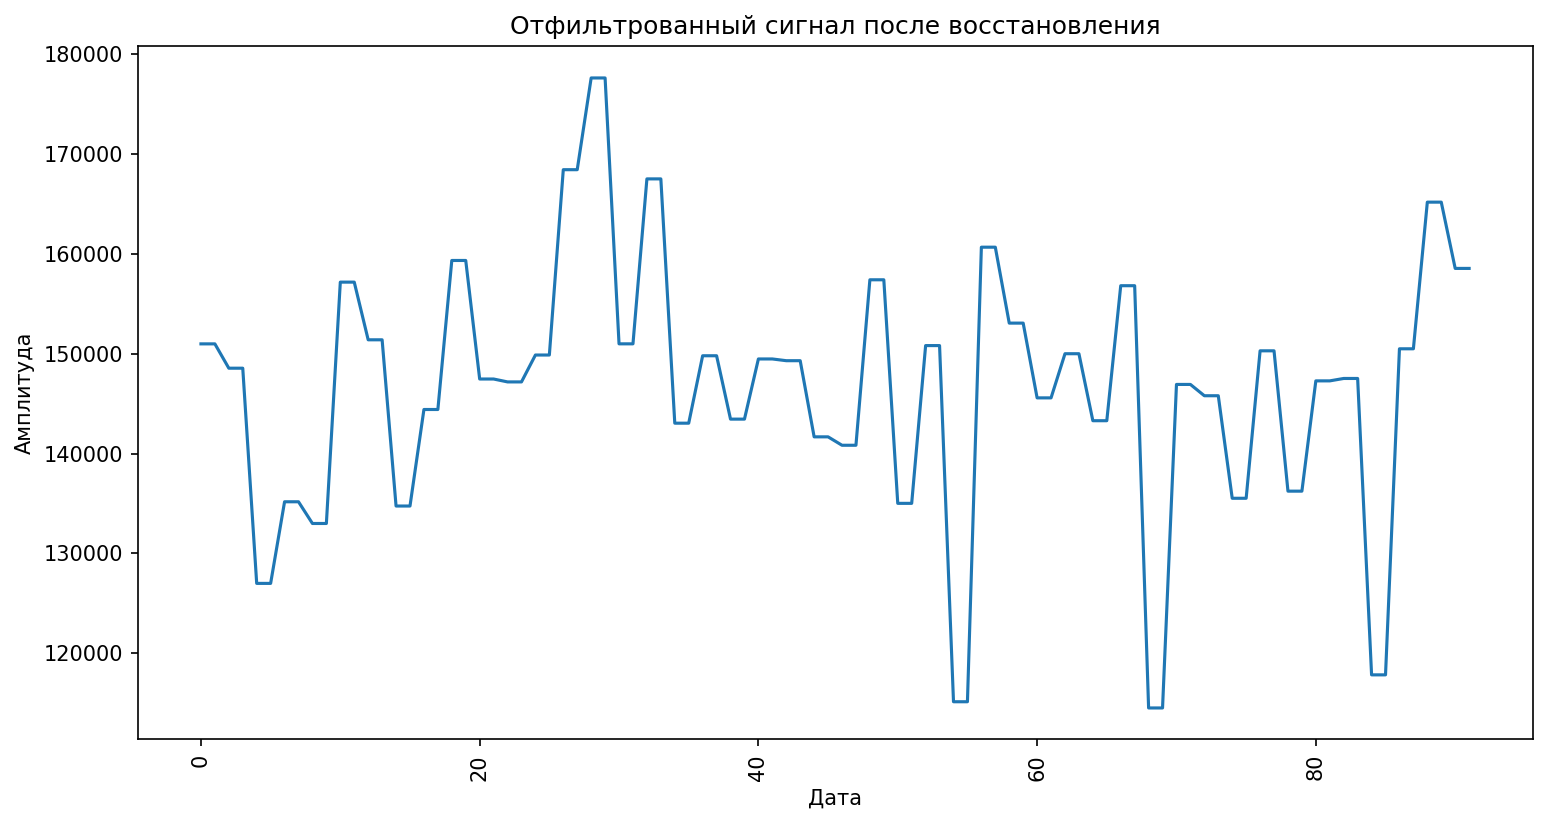

In [184]:
# 12 — Проводим восстановление сигнала с помощью быстрого обратного преобразования Фурье

# Определение порога
# Пример порога (стандартное отклонение * 2)
WAVELET_NAME = 'haar'
threshold = np.std(wavelet_coeffs[-1]) * 4

# Применение пороговой фильтрации к коэффициентам вейвлет-преобразования
thresholded_coeffs = pywt.threshold(wavelet_coeffs[0], threshold, mode='soft')

# Обратное вейвлет-преобразование для восстановления сигнала
filtered_signal = pywt.idwt(thresholded_coeffs, None, WAVELET_NAME)

# Выравниваем длины индекса и значений сигнала
if len(series.index) != len(filtered_signal):
    grouped_data_index = series.index[:len(filtered_signal)]
    filtered_signal = filtered_signal[:len(series.index)]
else:
    grouped_data_index = series.index

r_df = pd.DataFrame({DURATION_MS: filtered_signal}, index=grouped_data_index)

pyplot.figure(figsize=(12, 6), dpi=150)
pyplot.plot(grouped_data_index, filtered_signal)
pyplot.title('Отфильтрованный сигнал после восстановления')
pyplot.xlabel('Дата')
pyplot.ylabel('Амплитуда')
pyplot.xticks(rotation=90)
pyplot.show()

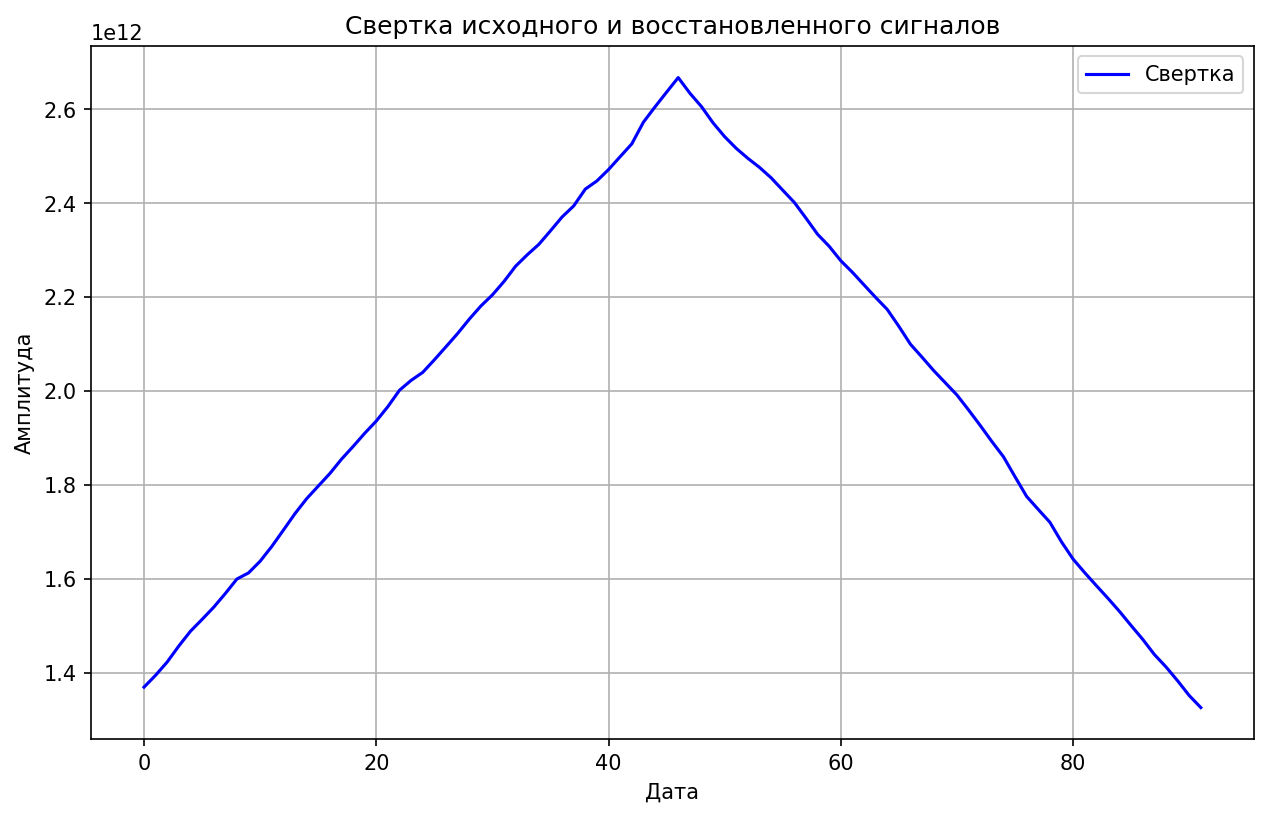

In [185]:
#13 — Свертка исходного и востановленного сигнала
# Свертка между исходным и восстановленным сигналами позволяет оценить степень совпадения между ними и выделить различия или сходства в их формах. Этот процесс выполняется путем выполнения операции свертки, которая является математической операцией объединения двух функций и позволяет увидеть, где и как сигналы совпадают или расходятся друг относительно друга
# Если свертка исходного и восстановленного сигналов дает какой-то результат, это может указывать на то, что восстановленный сигнал хорошо соответствует исходному. Однако, если свертка показывает значительные различия, это может свидетельствовать о том, что восстановление сигнала не является точным или что восстановленный сигнал не полностью совпадает с исходным
# Анализ свертки может помочь в определении степени точности восстановления сигнала и выявлении областей, где восстановленный сигнал отличается от исходного. Это может быть важно для оценки качества методов восстановления сигналов и определения областей, требующих дополнительной коррекции или улучшения

# Построение графика отфильтрованного сигнала
pyplot.figure(figsize=(10, 6), dpi=150)

# Свертка исходного и восстановленного сигналов
convolution_result = np.convolve(data, filtered_signal, mode='same')

if len(series.index) != len(convolution_result):
    grouped_data_index = series.index[:len(convolution_result)]
    filtered_signal = convolution_result[:len(series.index)]
else:
    grouped_data_index = series.index

pyplot.plot(grouped_data_index, convolution_result, color='blue', label='Свертка')

pyplot.title('Свертка исходного и восстановленного сигналов')
pyplot.xlabel('Дата')
pyplot.ylabel('Амплитуда')
pyplot.legend()
pyplot.grid(True)
pyplot.show()

In [186]:
# 14-15 — Находим меру близости и схожести исходного и восстановленного сигналов
# Т.е. сравниваем среднеквадратичные отклонения, а также квадратичные отклонения исходного и восстановленного сигналов

correlation_coefficient, _ = pearsonr(data, filtered_signal)
mae = mean_absolute_error(data, filtered_signal)

{'Коэффициент корреляции Пирсона': correlation_coefficient,
 'Средняя абсолютная ошибка (MAE)': mae}

{'Коэффициент корреляции Пирсона': 0.7075227770078731,
 'Средняя абсолютная ошибка (MAE)': 50627.08269353457}

В ходе выполнения лабораторной работы был исследован сигнал, а также отфильтрован и восстановлен. Были получены навыки исследования и распознавания сигналов.